## Intellectual Property Disclaimer

This tutorial notebook is a pedagogical resource based on the work of Andreas C. Müller and Sarah Guido. The core material—including code routines, conceptual explanations, and illustrative examples—is sourced from their book:

> **"Introduction to Machine Learning with Python: A Guide for Data Scientists"** (O'Reilly Media, 2017).

I claim no intellectual property rights over the original book's content. All copyrights and rights to the source material are the property of the respective authors and publisher.

This adaptation is intended strictly for **educational purposes** to aid in teaching and learning machine learning concepts. It is not meant for commercial use in any form.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# Data loading

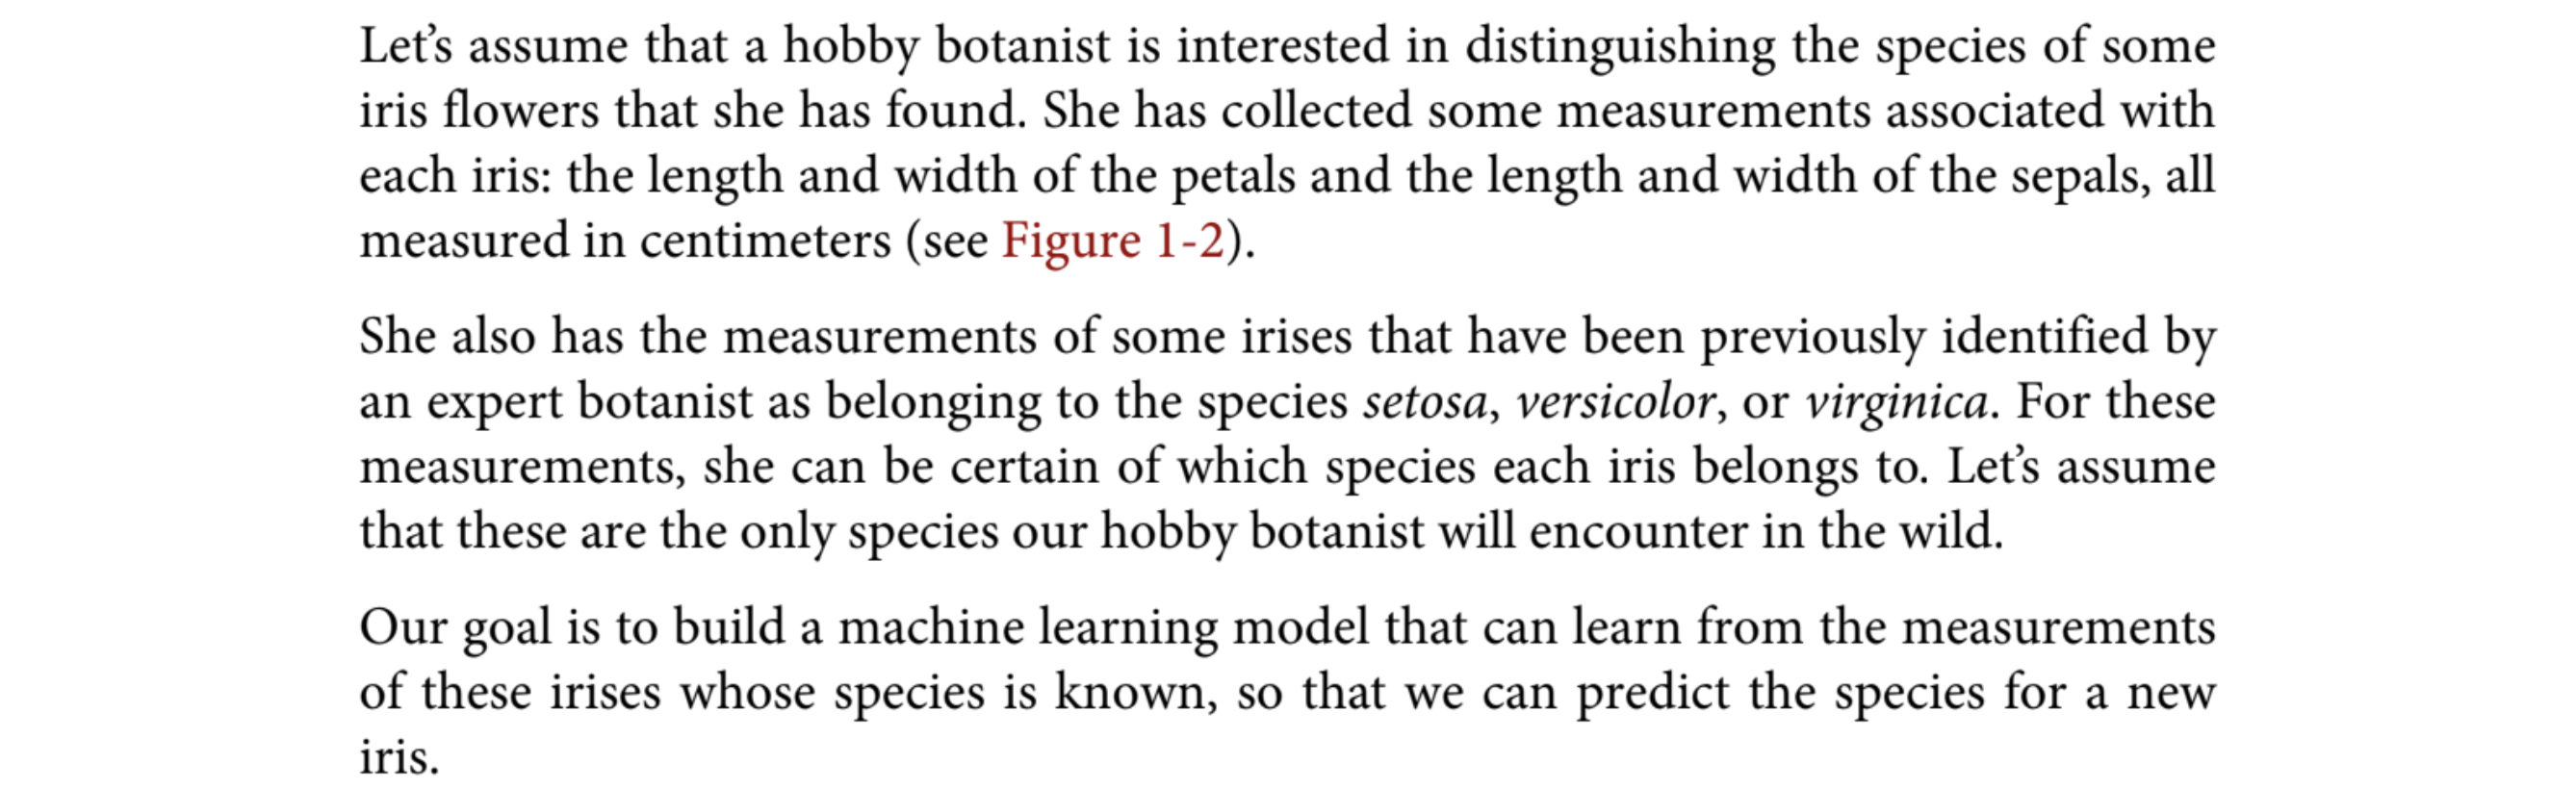

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_dataset = load_iris()

In [6]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
# Features (properties)

print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
# 4 kinds of measurements (features) for 150 flowers (samples)

print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [12]:
# Classification by species (target names)

print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Train - test split

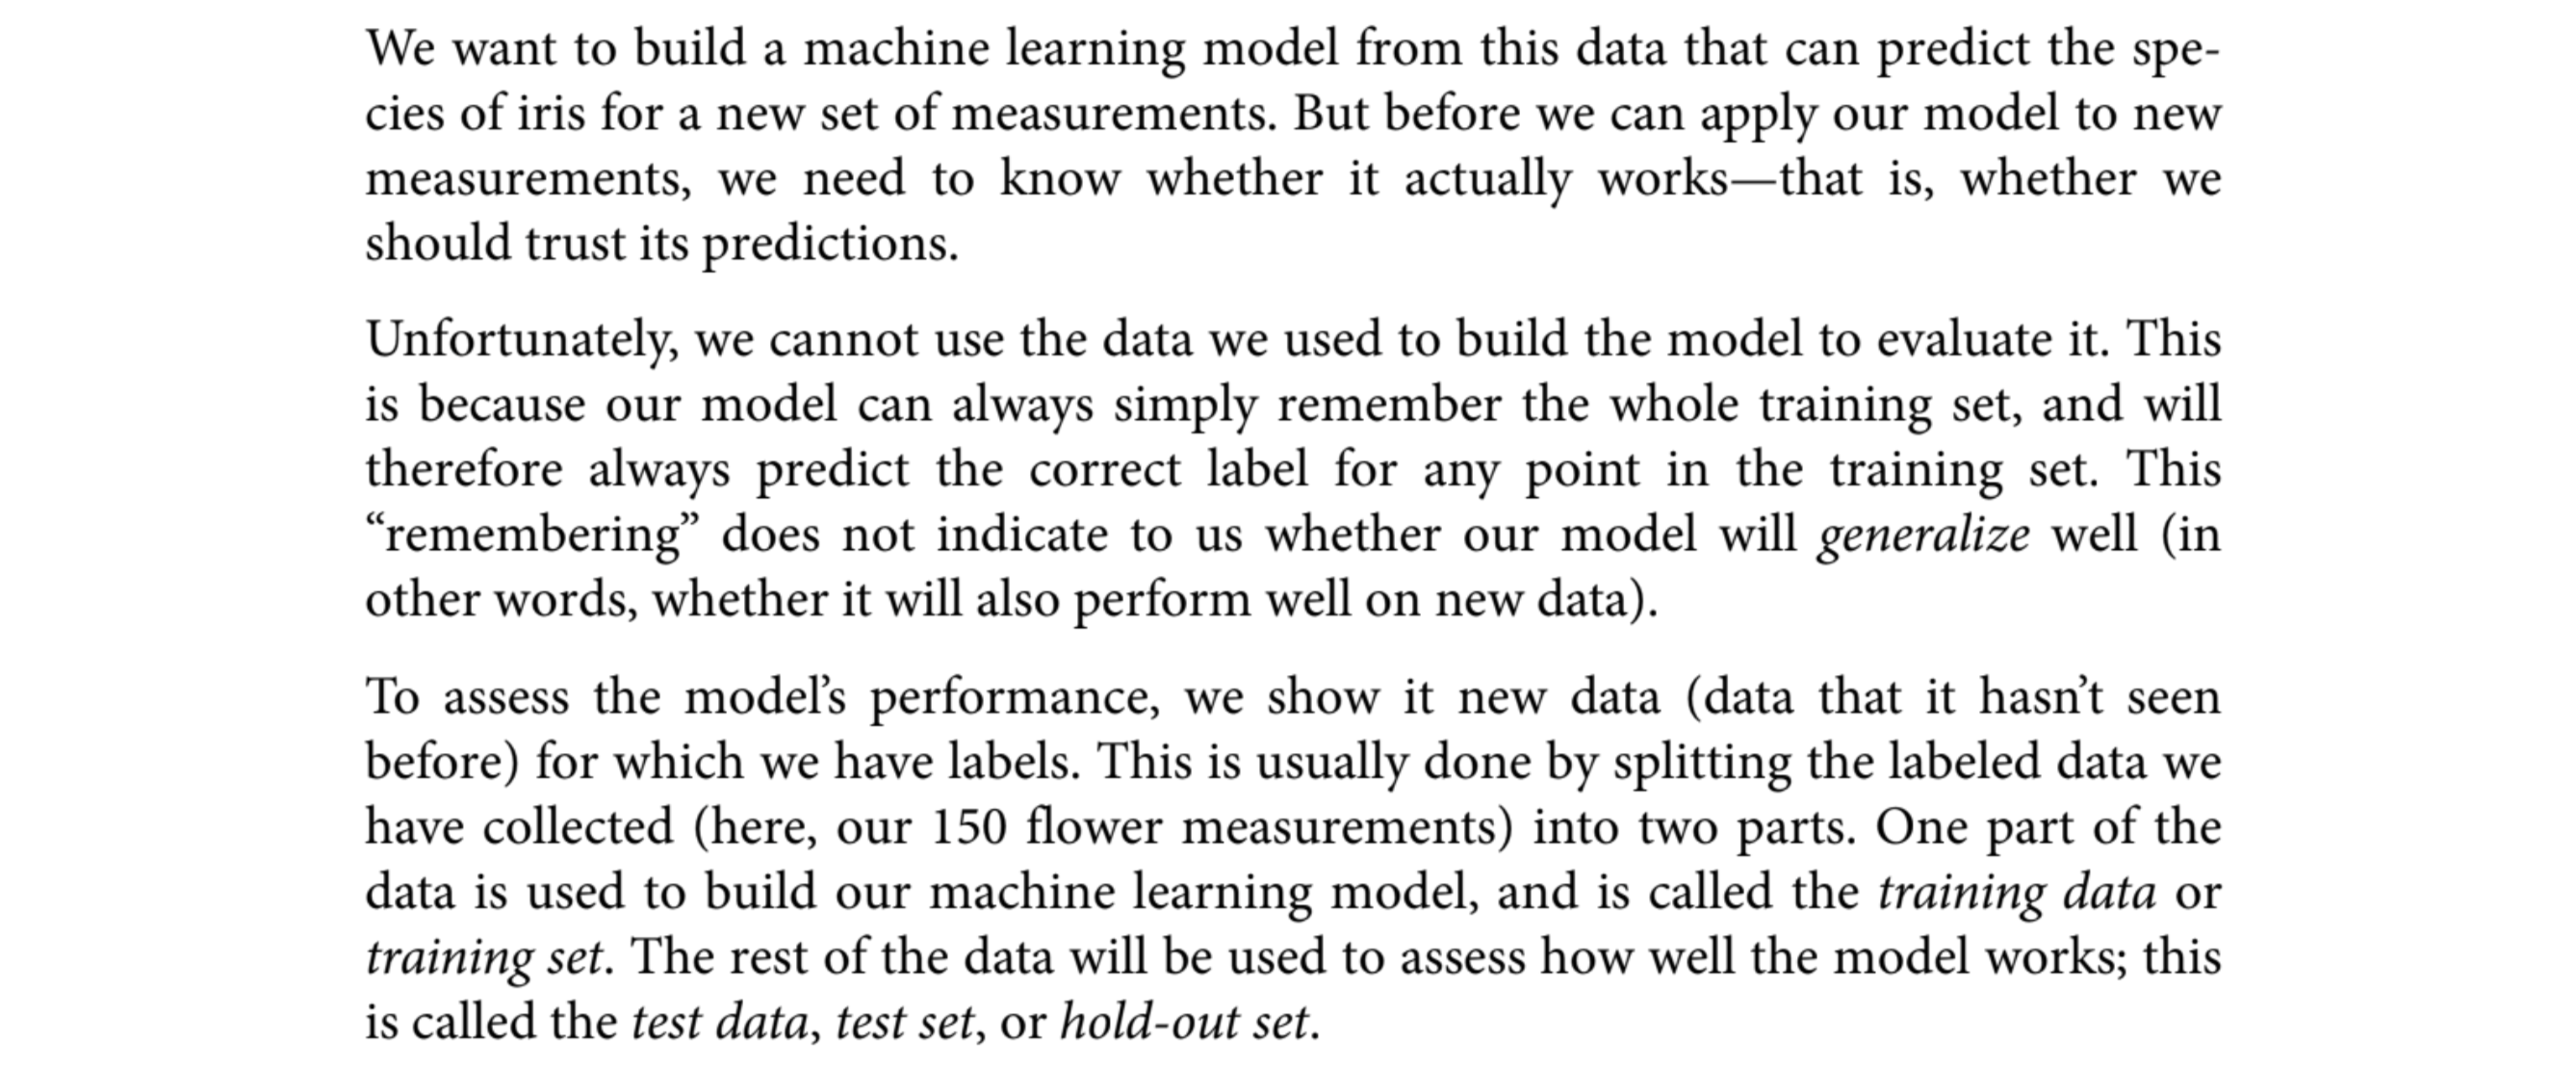

In [14]:
from sklearn.model_selection import train_test_split

# Need shuffling (happens internally) in case data is ordered!

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

# Look at the data: 3 classes visible

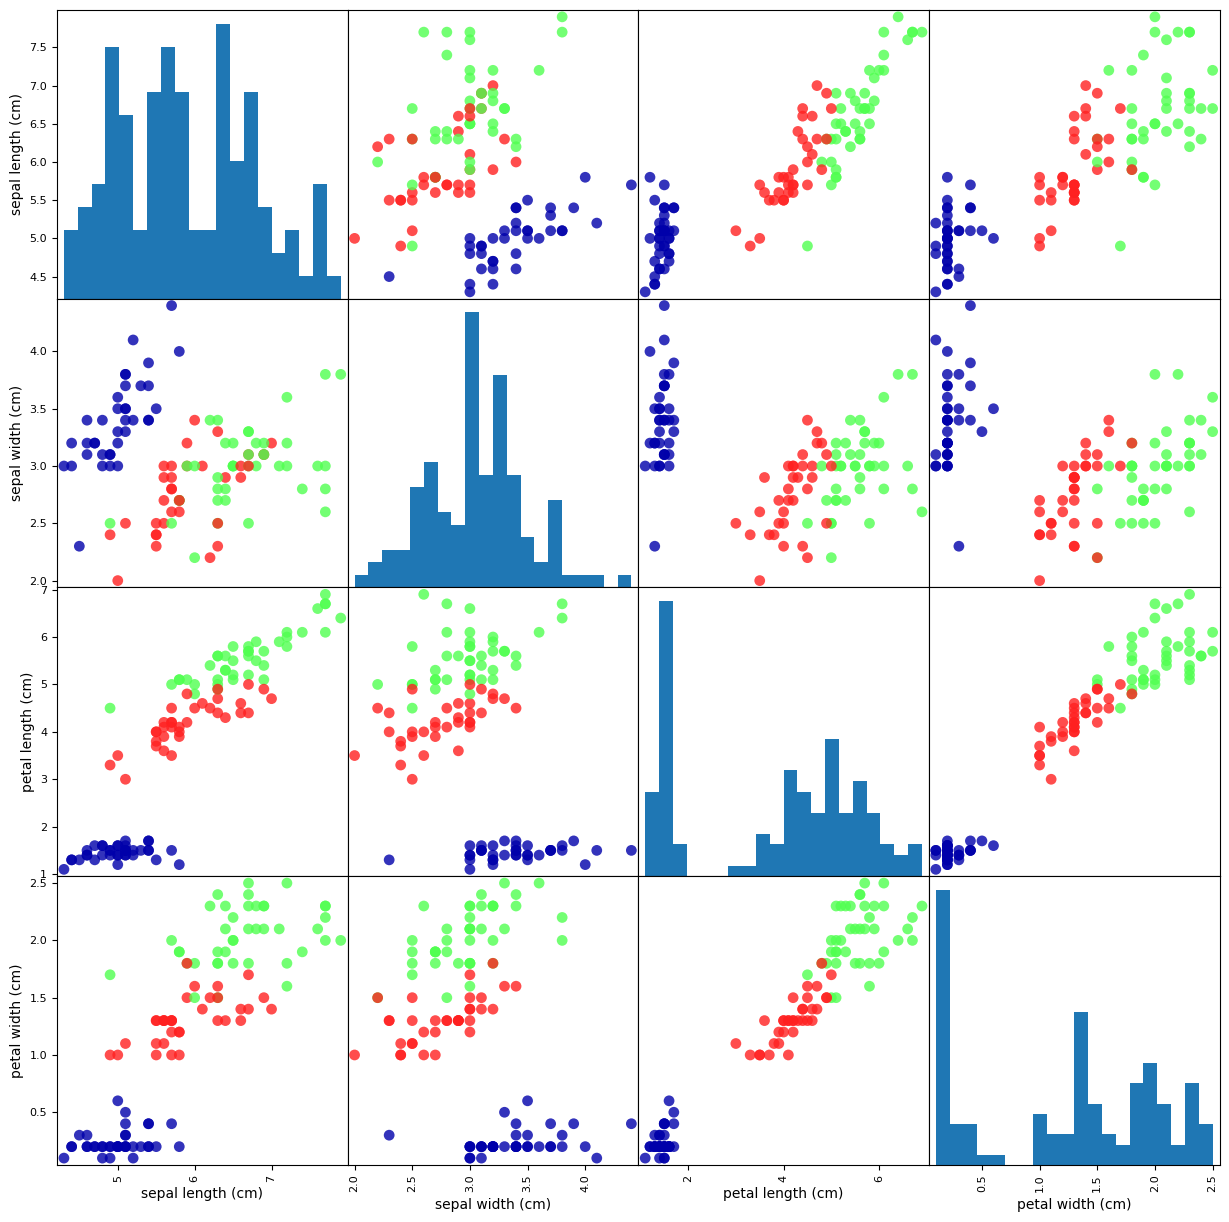

In [20]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)


grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Making predictions

In [25]:
# sepal length - sepal width - petal length - petal width

X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


# Evaluating the model

In [28]:
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [30]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
